In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from nltk.corpus import wordnet as wn

## sklearn basics
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import pydot

## pickle
import pickle
from pickle import dump
import json

# Load Angelica's Wine Category Dataset

In [16]:
wine_class = pd.read_csv('Resources/Wine_varieties_classified.csv')
del wine_class['Unnamed: 0']
wine_class['Red'] = wine_class['is_red'] + 1

wine_class = wine_class[['variety', 'is_white', 'Red']]
wine_class.columns = ['variety', 'White', 'Red']

wine_class = wine_class.fillna(0)

wine_class.head()

,variety,White,Red
0,Agiorgitiko,0.0,1.0
1,Aglianico,0.0,1.0
2,Alvarinho,1.0,0.0
3,Arneis,1.0,0.0
4,Assyrtiko,1.0,0.0


# Convert wine variety to list to filter main dataset

In [17]:
wines_to_keep = wine_class.variety.tolist()

# Load the Reviews Dataset

In [18]:
full_df = pd.read_csv('Resources/Wine_Reviews_ML.csv')
full_df.head()

,country,description,points,province,variety,description_split
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,Sicily & Sardinia,White Blend,"['Aromas', 'include', 'tropical', 'fruit', 'br..."
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,Douro,Portuguese Red,"['is', 'ripe', 'fruity', 'wine', 'is', 'smooth..."
2,US,"Tart and snappy, the flavors of lime flesh and...",87,Oregon,Pinot Gris,"['Tart', 'snappy', 'flavors', 'lime', 'flesh',..."
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,Michigan,Riesling,"['Pineapple', 'rind', 'lemon', 'pith', 'orange..."
4,US,"Much like the regular bottling from 2012, this...",87,Oregon,Pinot Noir,"['Much', 'like', 'regular', 'bottling', '2012'..."


# Filter the dataset by the list of wine varieties

In [92]:
subset = full_df.loc[full_df.variety.isin(wines_to_keep)]

subset.head()

,country,description,points,province,variety,description_split
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,Sicily & Sardinia,White Blend,"['Aromas', 'include', 'tropical', 'fruit', 'br..."
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,Michigan,Riesling,"['Pineapple', 'rind', 'lemon', 'pith', 'orange..."
4,US,"Much like the regular bottling from 2012, this...",87,Oregon,Pinot Noir,"['Much', 'like', 'regular', 'bottling', '2012'..."
6,Italy,"Here's a bright, informal red that opens with ...",87,Sicily & Sardinia,Frappato,"['Here', 'a', 'bright', 'informal', 'red', 'op..."
10,US,"Soft, supple plum envelopes an oaky structure ...",87,California,Cabernet Sauvignon,"['Soft', 'supple', 'plum', 'envelopes', 'oaky'..."


# Merge datasets

In [93]:
merge_df = subset.merge(wine_class, on='variety', suffixes = ("",""))

merge_df.head()

,country,description,points,province,variety,description_split,White,Red
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,Sicily & Sardinia,White Blend,"['Aromas', 'include', 'tropical', 'fruit', 'br...",1.0,0.0
1,Italy,Delicate aromas recall white flower and citrus...,87,Sicily & Sardinia,White Blend,"['Delicate', 'aromas', 'recall', 'white', 'flo...",1.0,0.0
2,Italy,Pretty aromas of yellow flower and stone fruit...,87,Sicily & Sardinia,White Blend,"['Pretty', 'aromas', 'yellow', 'flower', 'ston...",1.0,0.0
3,Italy,"Part of the extended Calanìca series, this Gri...",86,Sicily & Sardinia,White Blend,"['Part', 'extended', 'Calanìca', 'series', 'Gr...",1.0,0.0
4,Italy,Made predominantly with Trebbiano and Malvasia...,87,Tuscany,White Blend,"['Made', 'predominantly', 'Trebbiano', 'Malvas...",1.0,0.0


# Get synonym list of most frequent adjectives from Wordnet

In [21]:
adjective_list = ["ripe", "crisp", "mature", "tropical", "rich", "sweet", "fresh", "honeyed", "fruity", "smooth", 
                  "soft", "bright", "dry", "earthy", "rubbery", "savory", "vanilla", "bitter", "intense", 
                  "traditional", "nutty"]

refined_dict = {}

for item in adjective_list:
    synonym = wn.synsets(item, pos=wn.ADJ)
    temp_list = []
    for lemma in synonym:
        l = lemma.name()
        l = l.split(".")[0]
        if l not in temp_list:
            temp_list.append(l)
            
    refined_dict[item] = temp_list
    
refined_dict

{'ripe': ['ripe', 'good', 'advanced'],
 'crisp': ['crisp'],
 'mature': ['mature', 'ripe', 'fledged'],
 'tropical': ['tropical'],
 'rich': ['rich', 'fat', 'deep', 'full-bodied', 'ample'],
 'sweet': ['sweet',
  'angelic',
  'dulcet',
  'gratifying',
  'odoriferous',
  'fresh',
  'sugared'],
 'fresh': ['fresh', 'bracing', 'clean'],
 'honeyed': ['honeyed', 'dulcet'],
 'fruity': ['fruity', 'balmy'],
 'smooth': ['smooth', 'politic', 'fluent', 'legato', 'placid'],
 'soft': ['soft',
  'delicate',
  'voiced',
  'piano',
  'indulgent',
  'gentle',
  'easy',
  'cushy',
  'balmy'],
 'bright': ['bright', 'undimmed'],
 'dry': ['dry'],
 'earthy': ['crude', 'earthy', 'down-to-earth'],
 'rubbery': ['rubbery', 'cartilaginous'],
 'savory': ['savory', 'piquant', 'mouth-watering'],
 'vanilla': ['vanilla'],
 'bitter': ['acrimonious', 'bitter', 'acerb', 'biting'],
 'intense': ['intense', 'acute'],
 'traditional': ['traditional'],
 'nutty': ['nutty', 'balmy']}

# Iterate through dataframe rows to create columns for each adjective on the list and record frequency for that adjective or its synonym

In [22]:
for item in adjective_list:
    merge_df[item] = 0

for item in adjective_list:
    syn_list = refined_dict[item]
    for index, row in merge_df.iterrows():
        for syn in syn_list:
            merge_df[item][index] += merge_df['description_split'][index].count(syn)
        

/Users/richagautam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Drop description rows now that we have frequencies

In [30]:
merge_df = merge_df.drop(["description", "description_split"], axis=1)

merge_df = pd.get_dummies(merge_df, columns=['country','province'], prefix='', prefix_sep='')

def f(row):
    if (row['points'] <= 100) and (row['points'] >= 95):
        val = 4
    elif (row['points'] < 95) and (row['points'] >= 90):
        val = 3
    elif (row['points'] < 90) and (row['points'] >= 85):
        val = 2
    else:
        val = 1
    return val

merge_df['points_grouped'] = merge_df.apply(f, axis=1)

merge_df = merge_df.drop(["points"], axis=1)

merge_df.to_csv("Resources/Filtered_ML_matrix_forVar.csv", index=False)

merge_df.head()

,variety,White,Red,ripe,crisp,mature,tropical,rich,sweet,fresh,...,Western Australia,Western Cape,Wiener Gemischter Satz,Württemberg,Zenata,Österreichischer Perlwein,Österreichischer Sekt,Štajerska,Župa,points_grouped
0,White Blend,1.0,0.0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,White Blend,1.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,White Blend,1.0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,White Blend,1.0,0.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,White Blend,1.0,0.0,2,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [3]:
##Reopen DF

merge_df = pd.read_csv('Resources/Filtered_ML_matrix_forVar.csv')
merge_df.head()

,variety,White,Red,ripe,crisp,mature,tropical,rich,sweet,fresh,...,Western Australia,Western Cape,Wiener Gemischter Satz,Württemberg,Zenata,Österreichischer Perlwein,Österreichischer Sekt,Štajerska,Župa,points_grouped
0,White Blend,1.0,0.0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,White Blend,1.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,White Blend,1.0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,White Blend,1.0,0.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,White Blend,1.0,0.0,2,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


# Start machine learning!

## First, wine variety

In [4]:
##Set features. This will also be used as your x values.
X = merge_df.drop(["variety"], axis=1)
y = merge_df["variety"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,White,Red,ripe,crisp,mature,tropical,rich,sweet,fresh,honeyed,...,Western Australia,Western Cape,Wiener Gemischter Satz,Württemberg,Zenata,Österreichischer Perlwein,Österreichischer Sekt,Štajerska,Župa,points_grouped
23984,0.0,1.0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,2
12897,0.0,1.0,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
27795,0.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
27344,0.0,1.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
64132,0.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [10]:
##Scale your data

X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
##Random Forests
rf = RandomForestClassifier(n_estimators=400)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.5709278643489794

In [6]:
##Predict
rf_predict = rf.predict(X_test_scaled)

In [7]:
##Compare to actual
rf_actual = y_test

actual = np.array(rf_actual)
actual_df = pd.DataFrame(rf_actual)
actual_df["Predicted"] = rf_predict
comparison = actual_df.rename(columns = {0: "Actual"})
comparison.head(10)

,variety,Predicted
39750,Chardonnay,Chardonnay
24369,Cabernet Sauvignon,Cabernet Sauvignon
2901,Riesling,Chardonnay
42881,Malbec,Pinot Noir
71402,Zinfandel,Cabernet Sauvignon
5034,Riesling,Riesling
29238,Cabernet Sauvignon,Pinot Noir
3559,Riesling,Riesling
74252,Nebbiolo,Nebbiolo
49968,Red Blend,Red Blend


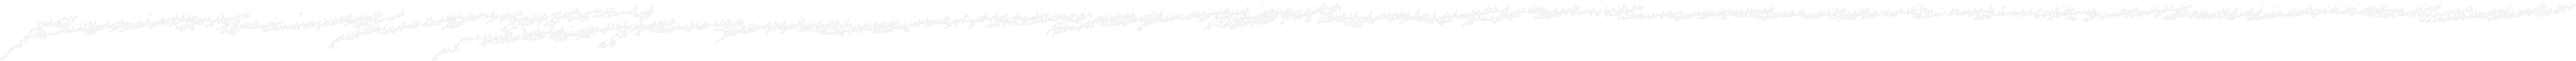

In [50]:
##Visualize

estimator = rf.estimators_[5]

# Export as dot file
export_graphviz(estimator, out_file='tree_var.dot', 
                feature_names = X.columns,
                rounded = True, precision = 1)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree_var.dot', '-o', 'tree_var.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree_var.png')

In [8]:
##Save model

filename = 'variety_rf.h5'
pickle.dump(rf, open(filename, 'wb'))

##Save the scaler
pickle.dump(X_scaler, open('X_scaler.h5', 'wb'))

## Predict with input data

In [25]:
variables = X.columns.tolist()

variables.remove('points_grouped')

input_list = ['dry', 'crisp','France']

points_grouped = 4

input_dict = {}

for name in variables:
    if name in input_list:
        input_dict[name] = [1]
    else:
        input_dict[name] = [0]
        
input_dict['points_grouped'] = [points_grouped]

In [26]:
test_df = pd.DataFrame.from_dict(input_dict, orient='columns')

test_df.head()

,White,Red,ripe,crisp,mature,tropical,rich,sweet,fresh,honeyed,...,Western Australia,Western Cape,Wiener Gemischter Satz,Württemberg,Zenata,Österreichischer Perlwein,Österreichischer Sekt,Štajerska,Župa,points_grouped
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [27]:
test_scaled = X_scaler.transform(test_df)

In [28]:
rf_predict = rf.predict(test_scaled)

rf_predict

array(['Chardonnay'], dtype=object)

In [96]:
countries = merge_df.country.tolist()

country_province = {}

for country in countries:
    temp_df = merge_df.loc[merge_df.country == country]
    provinces = temp_df.province.tolist()
    provinces_cleaned = []
    for province in provinces:
        if province not in provinces_cleaned:
            provinces_cleaned.append(province)
    country_province[country] = provinces_cleaned
    
country_province

{'Italy': ['Sicily & Sardinia',
  'Tuscany',
  'Northeastern Italy',
  'Central Italy',
  'Veneto',
  'Piedmont',
  'Southern Italy',
  'Lombardy',
  'Italy Other',
  'Northwestern Italy'],
 'France': ['Alsace',
  'Southwest France',
  'France Other',
  'Provence',
  'Bordeaux',
  'Languedoc-Roussillon',
  'Loire Valley',
  'Burgundy',
  'Rhône Valley',
  'Champagne',
  'Beaujolais'],
 'South Africa': ['Coastal Region',
  'Stellenbosch',
  'Overberg',
  'Western Cape',
  'Paarl',
  'Swartland',
  'Franschhoek',
  'Wellington',
  'Elgin',
  'Robertson',
  'Walker Bay',
  'Ceres Plateau',
  'Hemel en Aarde',
  'Cape South Coast',
  'Simonsberg-Stellenbosch',
  'Lutzville Valley',
  'Jonkershoek Valley',
  'Constantia',
  'Cederberg',
  'South Africa',
  'Tulbagh',
  'Devon Valley',
  'Simonsberg-Paarl',
  'Darling',
  'Cape Peninsula',
  'Bot River',
  'Durbanville',
  'Piekenierskloof',
  'Breedekloof',
  'Olifants River',
  'Northern Cape',
  'Groenekloof',
  'Paardeberg',
  'Philadelp

In [100]:
with open('Resources/Country_Province.json', 'w') as fp:
    json.dump(country_province, fp)


In [ ]:
merge_df['White'] = merge_df['White'].map({1: 'White', 0: 'Red'})
merge_df = merge_df.rename(columns={'White': 'category'})

del merge_df['Red']

merge_df = pd.get_dummies(merge_df, columns=['variety'], prefix=None)

merge_df.to_csv("Resources/Filtered_ML_matrix_forCat.csv", index=False)

merge_df = pd.read_csv("Resources/Filtered_ML_matrix_forCat.csv")

merge_df.head()

In [ ]:
##Set features

X = merge_df.drop(["category"], axis=1)
y = merge_df["category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

In [106]:
##Scale your data

X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
rf = RandomForestClassifier(n_estimators=400)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

In [108]:
##Predict

rf_predict = rf.predict(X_test_scaled)

In [ ]:
##Compare to actual
rf_actual = y_test

actual = np.array(rf_actual)
actual_df = pd.DataFrame(rf_actual)
actual_df["Predicted"] = rf_predict
comparison = actual_df.rename(columns = {0: "Actual"})
comparison.head(10)

In [ ]:
rf_predict = rf.predict(X_test_scaled)

In [143]:
rf_actual = y_test

actual = np.array(rf_actual)
actual_df = pd.DataFrame(rf_actual)
actual_df["Predicted"] = rf_predict
comparison = actual_df.rename(columns = {0: "Actual"})
comparison.head(10)

In [ ]:
# Save model

filename = 'category_rf.sklearn'
pickle.dump(rf, open(filename, 'wb'))

In [2]:
rf = pickle.load(open('variety_rf.sklearn', 'rb'))

,variety,White,Red,ripe,crisp,mature,tropical,rich,sweet,fresh,...,province_Western Australia,province_Western Cape,province_Wiener Gemischter Satz,province_Württemberg,province_Zenata,province_Österreichischer Perlwein,province_Österreichischer Sekt,province_Štajerska,province_Župa,points_grouped
0,White Blend,1.0,0.0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,White Blend,1.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,White Blend,1.0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,White Blend,1.0,0.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,White Blend,1.0,0.0,2,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
